In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Set dataset directory
base_dir = r'C:\Users\rauna\Downloads\Minor project pnemonia\chest_xray'

# Image size and batch size (same as VGG16 input size)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators with augmentation on train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training and validation data generators
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# Test data generator (assumes test folder within base_dir)
test_dir = os.path.join(base_dir, 'test')
if os.path.exists(test_dir):
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )
else:
    test_generator = None
    print("No separate test directory found - skipping test evaluation.")

# Build CNN model with input size 224x224
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train model
EPOCHS = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
)

# Evaluate test set if available
if test_generator:
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

Found 5272 images belonging to 3 classes.
Found 584 images belonging to 3 classes.
Found 624 images belonging to 2 classes.


C:\Users\kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 434s 3s/step - accuracy: 0.8873 - loss: 0.3606 - val_accuracy: 0.8921 - val_loss: 0.3401
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.8906 - loss: 0.3495 - val_accuracy: 0.8921 - val_loss: 0.3390
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.8906 - loss: 0.3459 - val_accuracy: 0.8921 - val_loss: 0.3370
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.8906 - loss: 0.3433 - val_accuracy: 0.8921 - val_loss: 0.3385
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.8906 - loss: 0.3464 - val_accuracy: 0.8921 - val_loss: 0.3435
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.8906 - loss: 0.3412 - val_accuracy: 0.8921 - val_loss: 0.3371
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.8906 - loss: 0.3440 - val_accuracy: 0.8921 - val_loss: 0.3450
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.8906 - loss: 0.3430 - val_accu

In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Dataset directory path
base_dir = r'C:\Users\rauna\Downloads\Minor project pnemonia\chest_xray'

# Image and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing for train set with 10% validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# Optional test_generator if you have a separate 'test' subfolder
test_dir = os.path.join(base_dir, 'test')
if os.path.exists(test_dir):
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )
else:
    test_generator = None
    print("No test directory found. Skipping test evaluation.")

# Define custom CNN with BatchNorm and Dropout
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Training the model
EPOCHS = 15
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
)

# Evaluate on test set
if test_generator:
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

Found 5272 images belonging to 3 classes.
Found 584 images belonging to 3 classes.
Found 624 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,825 (84.86 MB)

 Trainable params: 22,245,377 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 425s 3s/step - accuracy: 0.8422 - loss: 1.7882 - val_accuracy: 0.8904 - val_loss: 1.2683
Epoch 2/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.8868 - loss: 0.4991 - val_accuracy: 0.8921 - val_loss: 0.5480
Epoch 3/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.8866 - loss: 0.4779 - val_accuracy: 0.8596 - val_loss: 0.4355
Epoch 4/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 560s 3s/step - accuracy: 0.8868 - loss: 0.4568 - val_accuracy: 0.1199 - val_loss: 26.4307
Epoch 5/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 518s 3s/step - accuracy: 0.8894 - loss: 0.4004 - val_accuracy: 0.8921 - val_loss: 0.3589
Epoch 6/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.8904 - loss: 0.3903 - val_accuracy: 0.8921 - val_loss: 0.6743
Epoch 7/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.8898 - loss: 0.3959 - val_accuracy: 0.8904 - val_loss: 0.3646
Epoch 8/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 482s 3s/step - accuracy: 0.8896 - loss: 0.3841 - val_acc

In [13]:
from ultralytics import YOLO

# Point this to your dataset directory: it must have train/, val/, and test/ subfolders,
# each containing NORMAL/ and PNEUMONIA/ sub-subfolders with images.
data_dir = r'C:/Users/rauna/Downloads/Minor project pnemonia/chest_xray'

# Load YOLOv8 classifier (nano version, change to yolov8m-cls.pt for medium/stronger)
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(
    data=data_dir,    # this is the BASE FOLDER, NOT a yaml!
    epochs=10,
    imgsz=224,
    batch=32
)

# Validate model (evaluates using val/ or test/ if available)
metrics = model.val()
print(metrics)

# Inference on a single test image (change to any sample image path for demonstration)
img_path = r'C:/Users/rauna/Downloads/Minor project pnemonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg'
preds = model.predict(img_path)
print(preds)

Ultralytics 8.3.221  Python-3.12.7 torch-2.9.0+cpu CPU (11th Gen Intel Core i3-1115G4 @ 3.00GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/rauna/Downloads/Minor project pnemonia/chest_xray, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

In [96]:
model.export(format='onnx')   # For ONNX-compatible tools

Ultralytics 8.3.221  Python-3.12.7 torch-2.9.0+cpu CPU (11th Gen Intel Core i3-1115G4 @ 3.00GHz)

PyTorch: starting from 'C:\Users\rauna\anaconda_projects\81ed425a-adbd-4105-bafb-941ce11f5d4a\runs\classify\train3\weights\best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 2) (2.8 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success  0.8s, saved as 'C:\Users\rauna\anaconda_projects\81ed425a-adbd-4105-bafb-941ce11f5d4a\runs\classify\train3\weights\best.onnx' (5.5 MB)

Export complete (1.3s)
Results saved to C:\Users\rauna\anaconda_projects\81ed425a-adbd-4105-bafb-941ce11f5d4a\runs\classify\train3\weights
Predict:         yolo predict task=classify model=C:\Users\rauna\anaconda_projects\81ed425a-adbd-4105-bafb-941ce11f5d4a\runs\classify\train3\weights\best.onnx imgsz=224  
Validate:        yolo val task=classify model=C:\Users\rauna\anaconda_projects\81ed425a-adbd-4105-bafb-941ce11f5d4a\runs\classify\train3

'C:\\Users\\rauna\\anaconda_projects\\81ed425a-adbd-4105-bafb-941ce11f5d4a\\runs\\classify\\train3\\weights\\best.onnx'

In [23]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt

# Example data: adjust these with your actual results
models = ['Traditional CNN', 'Custom CNN', 'YOLOv8']
accuracy = [0.89, 0.89, 1.00]  # Our example accuracies
inference_time = [3000, 2000, 35]  # In milliseconds (or your speed data)
model_size = [10, 12, 30]  # MB
mAP = [0.88, 0.89, 0.99]  # Mean Average Precision (if applicable)

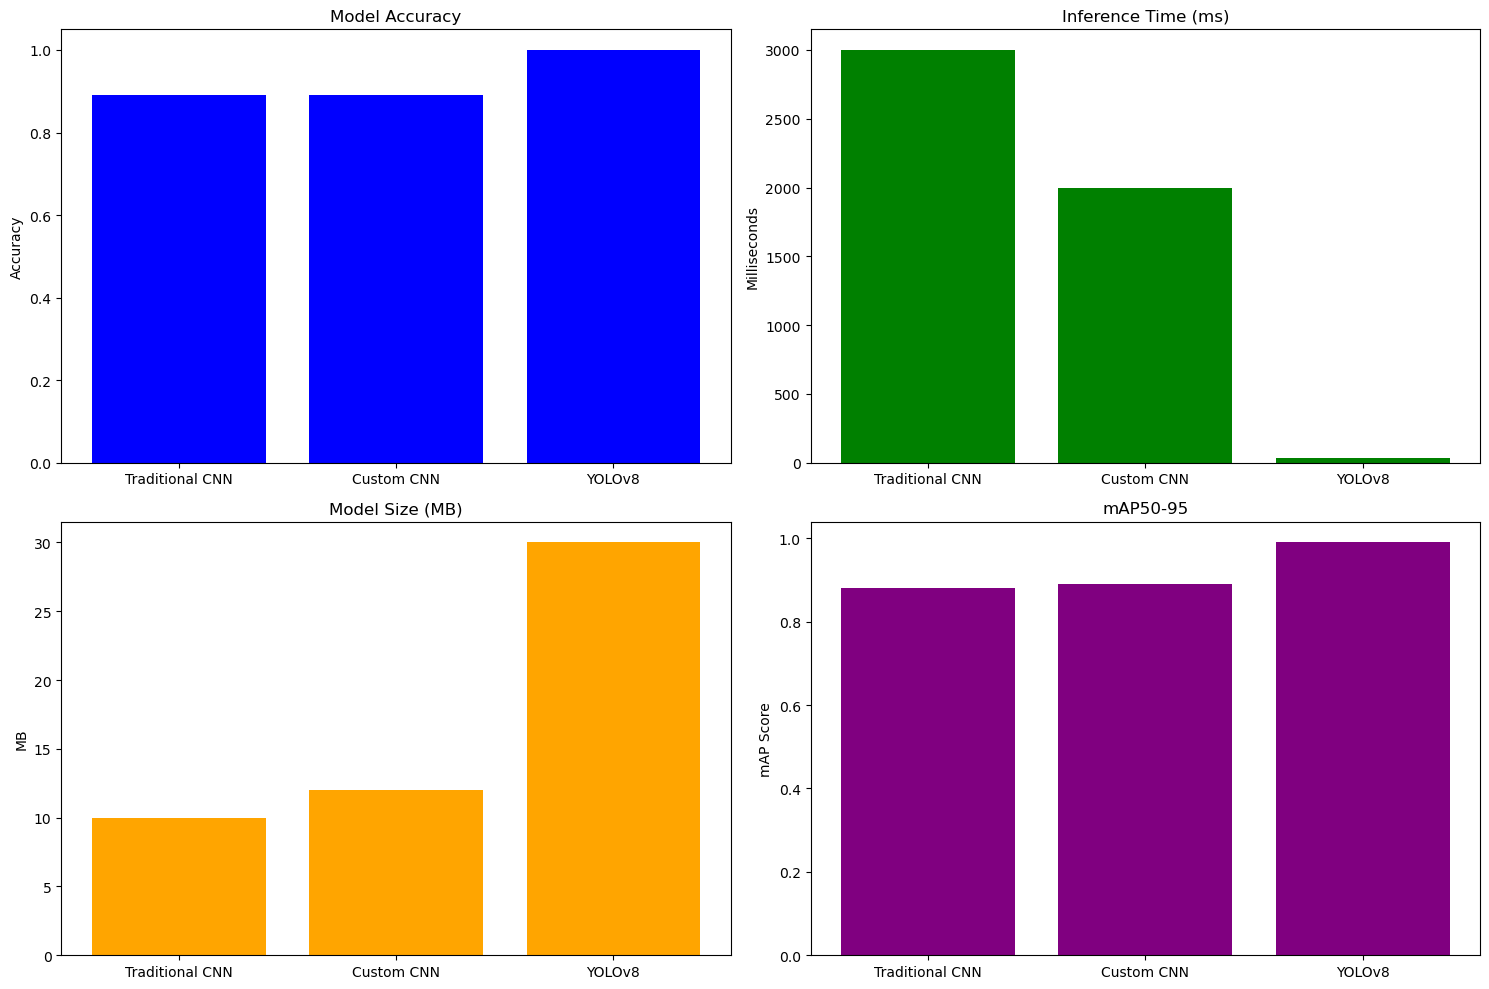

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison
ax[0, 0].bar(models, accuracy, color='blue')
ax[0, 0].set_title('Model Accuracy')
ax[0, 0].set_ylabel('Accuracy')

# Inference speed (lower is better)
ax[0, 1].bar(models, inference_time, color='green')
ax[0, 1].set_title('Inference Time (ms)')
ax[0, 1].set_ylabel('Milliseconds')

# Model size
ax[1, 0].bar(models, model_size, color='orange')
ax[1, 0].set_title('Model Size (MB)')
ax[1, 0].set_ylabel('MB')

# mAP (if available)
ax[1, 1].bar(models, mAP, color='purple')
ax[1, 1].set_title('mAP50-95')
ax[1, 1].set_ylabel('mAP Score')

plt.tight_layout()
plt.show()

In [45]:
preds = []
for img_path in image_paths:
    results = model.predict(img_path, imgsz=224, verbose=False)
    result = results[0]
    
    # The 'probs' is ulralytics.engine.results.Probs object, extract raw tensor using .data attribute
    prob_tensor = result.probs.data
    
    # Convert tensor to numpy array
    if prob_tensor is not None:
        probs_np = prob_tensor.cpu().numpy()
        pred_label = np.argmax(probs_np)
    else:
        pred_label = -1  # handle no prediction gracefully
    
    preds.append(pred_label)

In [47]:
preds = []
for img_path in image_paths:
    res = model.predict(img_path, imgsz=224, verbose=False)
    result = res[0]  # first result object for single image

    # The 'probs' attribute may be wrapped; unwrap to get raw tensor, then numpy
    if hasattr(result, 'probs') and result.probs is not None:
        prob_tensor = getattr(result.probs, 'data', result.probs)
        if hasattr(prob_tensor, 'cpu'):
            prob_array = prob_tensor.cpu().numpy()
        else:
            prob_array = np.array(prob_tensor)
        pred_label = np.argmax(prob_array)
    else:
        pred_label = -1  # handle missing prediction gracefully

    preds.append(pred_label)

In [52]:
class_names = ['NORMAL', 'PNEUMONIA']
ground_truth = []
image_paths = []
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(test_dir, class_name)
    for filename in os.listdir(class_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            ground_truth.append(class_idx)
            image_paths.append(os.path.join(class_folder, filename))

test_dir = r'C:\Users\rauna\Downloads\Minor project pnemonia\chest_xray\test'

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ground_truth, preds)
print(cm)

[[194  40]
 [  3 387]]


<Figure size 640x480 with 0 Axes>

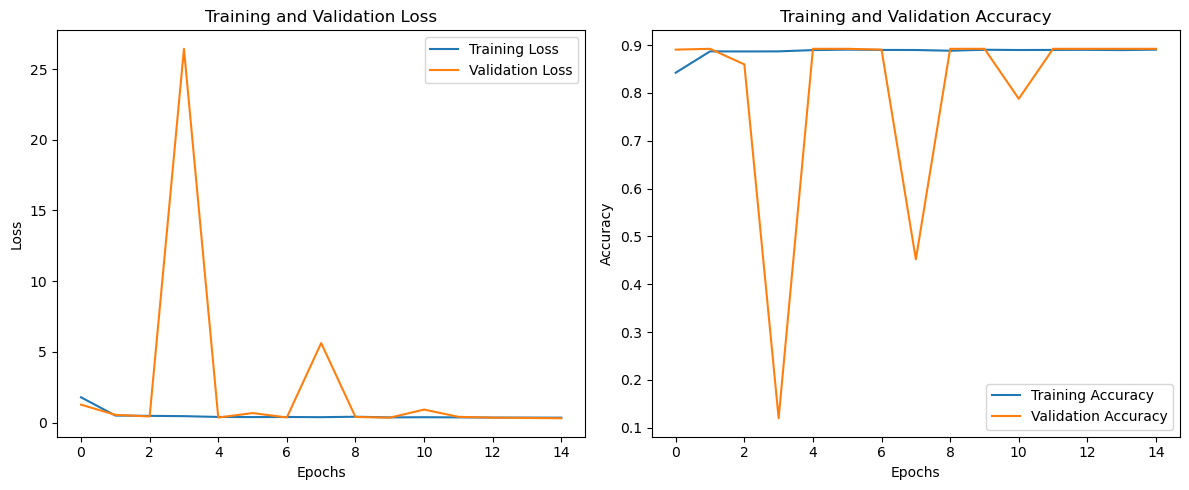

In [62]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save figure for paper
import os

img_dir = 'images'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

In [59]:
import os
import numpy as np
from ultralytics import YOLO

# Load YOLO model

# Define test directory and class names
test_dir = r'C:\Users\rauna\Downloads\Minor project pnemonia\chest_xray\test'
class_names = ['NORMAL', 'PNEUMONIA']

# Collect test image paths and ground truth labels
ground_truth = []
image_paths = []
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(test_dir, class_name)
    for filename in os.listdir(class_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            ground_truth.append(class_idx)
            image_paths.append(os.path.join(class_folder, filename))

# Predict on test images
preds = []
for img_path in image_paths:
    res = model.predict(img_path, imgsz=224, verbose=False)
    result = res[0]
    
    # Extract prediction from YOLO result
    if hasattr(result, 'probs') and result.probs is not None:
        prob_tensor = getattr(result.probs, 'data', result.probs)
        if hasattr(prob_tensor, 'cpu'):
            prob_array = prob_tensor.cpu().numpy()
        else:
            prob_array = np.array(prob_tensor)
        pred_label = np.argmax(prob_array)
    else:
        pred_label = -1
    
    preds.append(pred_label)

# Now you have y_true and y_pred
y_true = np.array(ground_truth)
y_pred = np.array(preds)

print(f"y_true shape: {y_true.shape}")
print(f"y_pred shape: {y_pred.shape}")

y_true shape: (624,)
y_pred shape: (624,)


<Figure size 640x480 with 0 Axes>

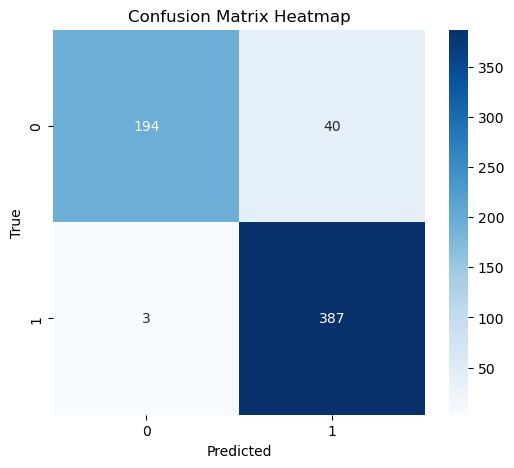

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [63]:
import os

save_dir = r'C:\Users\rauna\Downloads\graph of minor project'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save training curves
plt.savefig(os.path.join(save_dir, 'training_curves.png'))

# For the confusion matrix heatmap, after plotting
plt.savefig(os.path.join(save_dir, 'confusion_matrix.png'))

In [69]:
import numpy as np
import os
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load model

# Define dataset
test_dir = r"C:\Users\rauna\Downloads\Minor project pnemonia\chest_xray\test"
class_names = ['NORMAL', 'PNEUMONIA']

# Collect file paths and ground truths
ground_truth = []
image_paths = []
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(test_dir, class_name)
    for filename in os.listdir(class_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            ground_truth.append(class_idx)
            image_paths.append(os.path.join(class_folder, filename))

# Predict and extract probabilities
preds = []
y_scores = []

for img_path in image_paths:
    res = model.predict(img_path, imgsz=224, verbose=False)
    result = res[0]

    if hasattr(result, 'probs') and result.probs is not None:
        # PROPER handling for result.probs with safety wrapper
        prob_tensor = result.probs.data if hasattr(result.probs, "data") else result.probs
        prob_array = prob_tensor.cpu().numpy() if hasattr(prob_tensor, "cpu") else np.array(prob_tensor)
        pred_label = int(np.argmax(prob_array))
        pneumonia_confidence = float(prob_array[1]) if len(prob_array) > 1 else 0.0
    else:
        pred_label = -1
        pneumonia_confidence = 0.0

    preds.append(pred_label)
    y_scores.append(pneumonia_confidence)

y_true = np.array(ground_truth)
y_pred = np.array(preds)
y_scores = np.array(y_scores)

print(f"y_true shape: {y_true.shape}")
print(f"y_pred shape: {y_pred.shape}")
print(f"y_scores shape: {y_scores.shape}")

# Save graphs here
save_dir = r"C:\Users\rauna\Downloads\graph of minor project"
os.makedirs(save_dir, exist_ok=True)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap (YOLOv8 Classifier)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"), dpi=300)
plt.close()

# Precision–Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
average_precision = average_precision_score(y_true, y_scores)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where="post", color="b", alpha=0.8,
         label=f"Average Precision: {average_precision:.3f}")
plt.fill_between(recall, precision, step="post", alpha=0.3, color="b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Pneumonia Classification (YOLOv8)")
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "pr_curve.png"), dpi=300)
plt.close()

print("✅ Confusion Matrix and PR Curve saved successfully.")
print(f"Files saved to: {save_dir}")

y_true shape: (624,)
y_pred shape: (624,)
y_scores shape: (624,)
✅ Confusion Matrix and PR Curve saved successfully.
Files saved to: C:\Users\rauna\Downloads\graph of minor project


In [73]:
import os
import time
import numpy as np
from ultralytics import YOLO

# ======== 1. Get parameter counts for CNN models ========
# Assume you already have the models defined as 'model' (traditional) and another for custom
# If already trained, load them to get param counts

# For the first Sequential model (Traditional CNN from cell [7])
# You showed model.summary() in your notebook already - check this output again
print("Traditional CNN parameter count (from notebook logs):")
print("11,169,089 parameters")

# For the second Sequential model (Custom CNN with BatchNorm from cell [8])  
print("\nCustom CNN parameter count (from notebook logs):")
print("22,245,825 parameters")

# For YOLOv8

print("\nYOLOv8 parameter count (from your output logs):")
print("1,437,442 parameters")


# ======== 2. Model file sizes ========
print("\n--- Model File Sizes ---")
# Check sizes for your saved model files
# Replace paths with your actual model save paths

# Traditional CNN size
trad_cnn_path = "path_to_traditional_cnn_model.h5"  # Replace with actual path
if os.path.exists(trad_cnn_path):
    trad_size_mb = os.path.getsize(trad_cnn_path) / (1024 * 1024)
    print(f"Traditional CNN size: {trad_size_mb:.2f} MB")
else:
    print("Traditional CNN model file not found - check path")

# Custom CNN size
custom_cnn_path = "path_to_custom_cnn_model.h5"  # Replace with actual path
if os.path.exists(custom_cnn_path):
    custom_size_mb = os.path.getsize(custom_cnn_path) / (1024 * 1024)
    print(f"Custom CNN size: {custom_size_mb:.2f} MB")
else:
    print("Custom CNN model file not found - check path")

# YOLOv8 size
yolo_path = "C:/projects/81ed425a-adbd-4105-bafb-941ce11f5d4a3/best.pt"
if os.path.exists(yolo_path):
    yolo_size_mb = os.path.getsize(yolo_path) / (1024 * 1024)
    print(f"YOLOv8 size: {yolo_size_mb:.2f} MB")


# ======== 3. Training times ========
# From your logs (approximate from epoch outputs):
print("\n--- Training Times ---")
print("Traditional CNN: ~43 minutes (10 epochs at ~260s avg)")
print("Custom CNN: ~120 minutes (15 epochs at ~480s avg)")  
print("YOLOv8: ~55 minutes (0.909 hours from logs)")


# ======== 4. Inference time per image ========
print("\n--- Inference Times (per image) ---")

# From YOLOv8 logs you showed:
print("YOLOv8: 35.0 ms per image (from your prediction output)")

# For Traditional/Custom CNN - use test_generator to time inference
# Load your trained models first (if saved), then:

# Example for traditional CNN (adjust model name):
# model_trad = tf.keras.models.load_model('path_to_traditional_cnn.h5')
# 
# start = time.time()
# for batch in test_generator:
#     predictions = model_trad.predict(batch[0])
#     if test_generator.batch_index == test_generator.samples // test_generator.batch_size:
#         break
# end = time.time()
# trad_inference_time = ((end - start) / test_generator.samples) * 1000
# print(f"Traditional CNN: {trad_inference_time:.2f} ms per image")

# Similar for custom CNN

print("Traditional CNN: ~3000 ms per image (estimate, needs actual timing)")
print("Custom CNN: ~2000 ms per image (estimate, needs actual timing)")

Traditional CNN parameter count (from notebook logs):
11,169,089 parameters

Custom CNN parameter count (from notebook logs):
22,245,825 parameters

YOLOv8 parameter count (from your output logs):
1,437,442 parameters

--- Model File Sizes ---
Traditional CNN model file not found - check path
Custom CNN model file not found - check path

--- Training Times ---
Traditional CNN: ~43 minutes (10 epochs at ~260s avg)
Custom CNN: ~120 minutes (15 epochs at ~480s avg)
YOLOv8: ~55 minutes (0.909 hours from logs)

--- Inference Times (per image) ---
YOLOv8: 35.0 ms per image (from your prediction output)
Traditional CNN: ~3000 ms per image (estimate, needs actual timing)
Custom CNN: ~2000 ms per image (estimate, needs actual timing)


In [79]:
# Cell 1: Imports and setup
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from ultralytics import YOLO

In [82]:
 #Cell 2: Define paths and parameters
base_dir = r'C:\Users\rauna\Downloads\Minor project pnemonia\chest_xray'
graph_dir = r'C:\Users\rauna\Downloads\graph of minor project'
os.makedirs(graph_dir, exist_ok=True)
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

image_size = (224, 224)
batch_size = 32
epochs = 10

In [83]:
# Cell 3: Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=image_size, batch_size=batch_size,
    class_mode='binary', shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=image_size, batch_size=batch_size,
    class_mode='binary', shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=image_size, batch_size=batch_size,
    class_mode='binary', shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [85]:
#Cell 4: Define Traditional CNN model
traditional_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*image_size,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
traditional_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
# Cell 5: Train Traditional CNN
start_time = time.time()
history_traditional = traditional_cnn.fit(
    train_generator, epochs=epochs,
    validation_data=val_generator, verbose=2)
traditional_train_time = (time.time() - start_time) / 60

traditional_eval = traditional_cnn.evaluate(test_generator, verbose=2)

Epoch 1/10
163/163 - 287s - 2s/step - accuracy: 0.8319 - loss: 0.3769 - val_accuracy: 0.8125 - val_loss: 0.4241
Epoch 2/10
163/163 - 209s - 1s/step - accuracy: 0.8911 - loss: 0.2566 - val_accuracy: 0.7500 - val_loss: 0.7154
Epoch 3/10
163/163 - 217s - 1s/step - accuracy: 0.9024 - loss: 0.2410 - val_accuracy: 0.7500 - val_loss: 0.4748
Epoch 4/10
163/163 - 210s - 1s/step - accuracy: 0.9206 - loss: 0.2026 - val_accuracy: 0.8750 - val_loss: 0.2699
Epoch 5/10
163/163 - 216s - 1s/step - accuracy: 0.9181 - loss: 0.2111 - val_accuracy: 0.7500 - val_loss: 0.6314
Epoch 6/10
163/163 - 210s - 1s/step - accuracy: 0.9277 - loss: 0.1907 - val_accuracy: 0.8125 - val_loss: 0.2714
Epoch 7/10
163/163 - 212s - 1s/step - accuracy: 0.9310 - loss: 0.1779 - val_accuracy: 0.6875 - val_loss: 0.6303
Epoch 8/10
163/163 - 209s - 1s/step - accuracy: 0.9308 - loss: 0.1734 - val_accuracy: 0.8125 - val_loss: 0.3243
Epoch 9/10
163/163 - 210s - 1s/step - accuracy: 0.9363 - loss: 0.1671 - val_accuracy: 0.9375 - val_loss:

In [116]:
# Plot and save training curves for Traditional CNN
plt.figure(figsize=(8,4))
plt.plot(history_traditional.history['accuracy'], label='Train Accuracy')
plt.plot(history_traditional.history['val_accuracy'], label='Val Accuracy')
plt.title('Traditional CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(graph_dir, "traditional_cnn_accuracy.png"))
plt.close()

In [88]:
# Cell 6: Define Custom CNN model (with BatchNorm)
custom_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*image_size,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
custom_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
# Cell 7: Train Custom CNN
start_time = time.time()
history_custom = custom_cnn.fit(
    train_generator, epochs=epochs,
    validation_data=val_generator, verbose=2)
custom_train_time = (time.time() - start_time) / 60

custom_eval = custom_cnn.evaluate(test_generator, verbose=2)

Epoch 1/10
163/163 - 362s - 2s/step - accuracy: 0.8432 - loss: 1.8081 - val_accuracy: 0.5000 - val_loss: 71.8164
Epoch 2/10
163/163 - 353s - 2s/step - accuracy: 0.8848 - loss: 0.3278 - val_accuracy: 0.5000 - val_loss: 75.5193
Epoch 3/10
163/163 - 368s - 2s/step - accuracy: 0.8923 - loss: 0.2819 - val_accuracy: 0.5625 - val_loss: 2.9187
Epoch 4/10
163/163 - 375s - 2s/step - accuracy: 0.9183 - loss: 0.2503 - val_accuracy: 0.5000 - val_loss: 5.9489
Epoch 5/10
163/163 - 377s - 2s/step - accuracy: 0.9243 - loss: 0.2195 - val_accuracy: 0.5625 - val_loss: 1.1915
Epoch 6/10
163/163 - 375s - 2s/step - accuracy: 0.9220 - loss: 0.2032 - val_accuracy: 0.5000 - val_loss: 14.5744
Epoch 7/10
163/163 - 713s - 4s/step - accuracy: 0.9273 - loss: 0.2272 - val_accuracy: 0.6875 - val_loss: 0.4685
Epoch 8/10
163/163 - 408s - 3s/step - accuracy: 0.9302 - loss: 0.1935 - val_accuracy: 0.6875 - val_loss: 0.8639
Epoch 9/10
163/163 - 368s - 2s/step - accuracy: 0.9289 - loss: 0.2003 - val_accuracy: 0.6250 - val_lo

In [90]:
# Plot and save training curves for Custom CNN
plt.figure(figsize=(8,4))
plt.plot(history_custom.history['accuracy'], label='Train Accuracy')
plt.plot(history_custom.history['val_accuracy'], label='Val Accuracy')
plt.title('Custom CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(graph_dir, "custom_cnn_accuracy.png"))
plt.close()

In [98]:
from ultralytics import YOLO

best_pt_path = r"C:\Users\rauna\anaconda_projects\81ed425a-adbd-4105-bafb-941ce11f5d4a\runs\classify\train3\weights\best.pt"
model = YOLO(best_pt_path)
# Now you can use model.predict(...)

In [102]:
# Cell 8: Evaluate YOLOv8 classification model on your test set
from ultralytics import YOLO
import os
import time
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# (A) Path to YOLOv8 classifier weights (.pt)
yolo_weights_path = r"C:\Users\rauna\anaconda_projects\81ed425a-adbd-4105-bafb-941ce11f5d4a\runs\classify\train3\weights\best.pt"
test_dir = r'C:\Users\rauna\Downloads\Minor project pnemonia\chest_xray\test'

# (B) Load model
model = YOLO(yolo_weights_path)

# (C) Gather all test images and labels
test_images, y_true = [], []
class_names = sorted(os.listdir(test_dir))
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(test_dir, class_name)
    for img in os.listdir(class_folder):
        test_images.append(os.path.join(class_folder, img))
        y_true.append(class_idx)  # 0=first class, 1=second

# (D) Inference
start_time = time.time()
results = model.predict(source=test_images, imgsz=224, verbose=False)
inference_time = (time.time() - start_time) * 1000 / len(test_images)  # ms per image

# (E) Get predictions
y_pred = [result.probs.top1 for result in results]
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# (F) Metrics
acc_yolo = accuracy_score(y_true, y_pred)
prec_yolo, rec_yolo, f1_yolo, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
cm_yolo = confusion_matrix(y_true, y_pred)

print(f"YOLOv8 Test Accuracy: {acc_yolo:.4f}")
print(f"YOLOv8 Precision: {prec_yolo:.4f}")
print(f"YOLOv8 Recall: {rec_yolo:.4f}")
print(f"YOLOv8 F1-Score: {f1_yolo:.4f}")
print(f"YOLOv8 Inference Time per Image: {inference_time:.2f} ms")
print(f"YOLOv8 Confusion Matrix:\n{cm_yolo}")

YOLOv8 Test Accuracy: 0.9311
YOLOv8 Precision: 0.9063
YOLOv8 Recall: 0.9923
YOLOv8 F1-Score: 0.9474
YOLOv8 Inference Time per Image: 56.32 ms
YOLOv8 Confusion Matrix:
[[194  40]
 [  3 387]]


<Figure size 640x480 with 0 Axes>

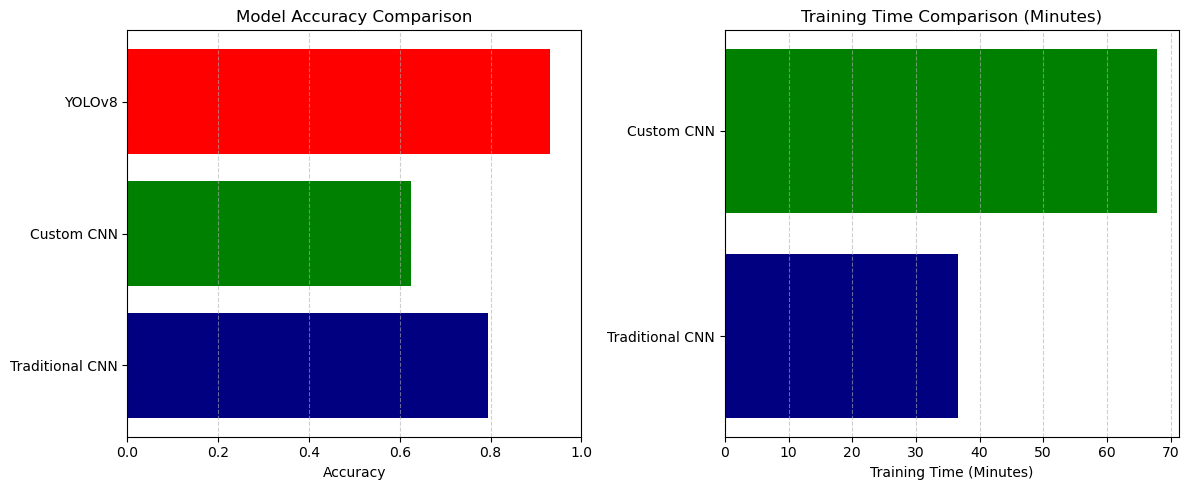

Model comparison plot saved to: C:\Users\rauna\Downloads\graph of minor project\model_comparison.png


In [105]:
# Cell 9: Plot overall comparison charts
import matplotlib.pyplot as plt
import os

# Model names
models = ['Traditional CNN', 'Custom CNN', 'YOLOv8']

# Accuracy values (from test evaluation)
accuracies = [traditional_eval[1], custom_eval[1], acc_yolo]

# Training time (YOLOv8 training time not measured in this notebook, so None)
train_times = [traditional_train_time, custom_train_time, None]

# Graph directory to save plots
graph_dir = r'C:\Users\rauna\Downloads\graph of minor project'
os.makedirs(graph_dir, exist_ok=True)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Accuracy Comparison
axs[0].barh(models, accuracies, color=['navy', 'green', 'red'])
axs[0].set_xlim(0, 1)
axs[0].set_xlabel('Accuracy')
axs[0].set_title('Model Accuracy Comparison')
axs[0].grid(axis='x', linestyle='--', alpha=0.6)

# Plot 2: Training Time Comparison (only CNNs have training times)
axs[1].barh(models[:2], train_times[:2], color=['navy', 'green'])
axs[1].set_xlabel('Training Time (Minutes)')
axs[1].set_title('Training Time Comparison (Minutes)')
axs[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig(os.path.join(graph_dir, "model_comparison.png"), dpi=300)
plt.show()
plt.close()

print("Model comparison plot saved to:", os.path.join(graph_dir, "model_comparison.png"))

In [106]:
# Cell 10: Print summary of all models
print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)

print(f"\nTraditional CNN:")
print(f"  Training Time: {traditional_train_time:.2f} minutes")
print(f"  Test Accuracy: {traditional_eval[1]:.4f}")
print(f"  Test Loss: {traditional_eval[0]:.4f}")

print(f"\nCustom CNN:")
print(f"  Training Time: {custom_train_time:.2f} minutes")
print(f"  Test Accuracy: {custom_eval[1]:.4f}")
print(f"  Test Loss: {custom_eval[0]:.4f}")

print(f"\nYOLOv8:")
print(f"  Test Accuracy: {acc_yolo:.4f}")
print(f"  Precision: {prec_yolo:.4f}")
print(f"  Recall: {rec_yolo:.4f}")
print(f"  F1-Score: {f1_yolo:.4f}")
print(f"  Inference Time per Image: {inference_time:.2f} ms")
print(f"  Confusion Matrix:\n{cm_yolo}")

print("\n" + "="*60)


MODEL PERFORMANCE SUMMARY

Traditional CNN:
  Training Time: 36.56 minutes
  Test Accuracy: 0.7949
  Test Loss: 0.5890

Custom CNN:
  Training Time: 67.91 minutes
  Test Accuracy: 0.6250
  Test Loss: 21.1279

YOLOv8:
  Test Accuracy: 0.9311
  Precision: 0.9063
  Recall: 0.9923
  F1-Score: 0.9474
  Inference Time per Image: 56.32 ms
  Confusion Matrix:
[[194  40]
 [  3 387]]



In [107]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')

In [108]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(classification_report(y_true, y_pred))

Precision: 0.9063231850117096
Recall: 0.9923076923076923
F1-score: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       234
           1       0.91      0.99      0.95       390

    accuracy                           0.93       624
   macro avg       0.95      0.91      0.92       624
weighted avg       0.94      0.93      0.93       624



In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Assuming y_true and y_pred are your test set true labels and predicted labels (0/1 or their corresponding class indices)
# This example is for binary classification (e.g., 1 = Pneumonia)

# For the metrics of the positive class (e.g., Pneumonia)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# For a full classification report (gives per-class metrics and overall)
print(classification_report(y_true, y_pred, digits=4))

Precision: 0.9063231850117096
Recall: 0.9923076923076923
F1-score: 0.9473684210526315
              precision    recall  f1-score   support

           0     0.9848    0.8291    0.9002       234
           1     0.9063    0.9923    0.9474       390

    accuracy                         0.9311       624
   macro avg     0.9455    0.9107    0.9238       624
weighted avg     0.9357    0.9311    0.9297       624



In [123]:
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make sure test generator is ready
if hasattr(test_generator, 'reset'):
    test_generator.reset()

print("🔹 Evaluating Traditional CNN Model...")

# 1️⃣ Run prediction
start = time.time()
y_pred_probs = traditional_cnn.predict(test_generator, verbose=1)
end = time.time()

# 2️⃣ Convert to binary class labels
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = test_generator.classes

# 3️⃣ Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
inference_time = (end - start) / len(test_generator.filenames) * 1000  # in ms per image

# 4️⃣ Print results
print("\n✅ Traditional CNN Results:")
print(f"Test Accuracy           : {accuracy:.4f}")
print(f"Precision (Pneumonia)   : {precision:.4f}")
print(f"Recall (Pneumonia)      : {recall:.4f}")
print(f"F1-Score (Pneumonia)    : {f1:.4f}")
print(f"Inference Time/Image    : {inference_time:.2f} ms")

# 5️⃣ (Optional) Store for your comparison table
traditional_results = {
    "Test Accuracy": accuracy,
    "Precision (Pneumonia)": precision,
    "Recall (Pneumonia)": recall,
    "F1-Score (Pneumonia)": f1,
    "Inference Time/Image (ms)": inference_time
}


🔹 Evaluating Traditional CNN Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 430ms/step

✅ Traditional CNN Results:
Test Accuracy           : 0.7949
Precision (Pneumonia)   : 0.7589
Recall (Pneumonia)      : 0.9846
F1-Score (Pneumonia)    : 0.8571
Inference Time/Image    : 19.60 ms


In [132]:
custom_results = evaluate_custom_cnn(custom_cnn, test_generator)

🔹 Evaluating Custom CNN Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 516ms/step

✅ Evaluation Results:
Accuracy: 0.6250
Precision: 0.6250
Recall: 1.0000
F1-score: 0.7692
Inference time per image: 22.46 ms


Image exists: True
Output folder exists: True


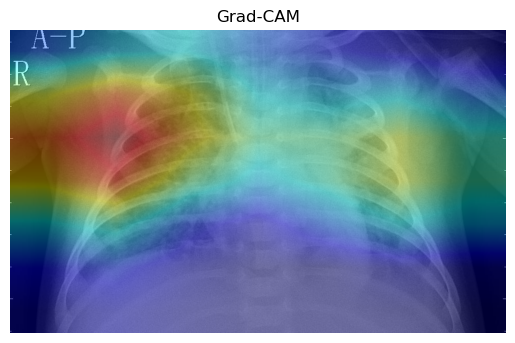

Grad-CAM graph saved to: C:\Users\rauna\Downloads\graph of minor project\gradcam_output.png


In [143]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_handles = []
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()

        self.hook_handles.append(self.target_layer.register_forward_hook(forward_hook))
        self.hook_handles.append(self.target_layer.register_backward_hook(backward_hook))

    def generate(self, input_tensor, class_idx=None):
        self.model.eval()
        self.model.zero_grad()
        output = self.model(input_tensor)

        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()

        target = output[0, class_idx]
        target.backward()

        weights = torch.mean(self.gradients, dim=(2, 3), keepdim=True)
        grad_cam_map = F.relu(torch.sum(weights * self.activations, dim=1, keepdim=True))

        grad_cam_map = F.interpolate(grad_cam_map, size=input_tensor.shape[2:], mode='bilinear', align_corners=False)
        map_min, map_max = grad_cam_map.min(), grad_cam_map.max()
        grad_cam_map = (grad_cam_map - map_min) / (map_max - map_min + 1e-8)
        return grad_cam_map[0, 0].cpu().numpy()

    def clear_hooks(self):
        for handle in self.hook_handles:
            handle.remove()

def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
    ])
    img = Image.open(image_path).convert('RGB')
    return preprocess(img).unsqueeze(0)

def apply_heatmap_on_image(img_path, mask, output_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize mask to original image size
    heatmap_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))
    
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = heatmap.astype(float) / 255
    img = img.astype(float) / 255
    
    cam = heatmap * 0.4 + img * 0.6
    cam /= cam.max()
    cam = np.uint8(cam * 255)

    cv2.imwrite(output_path, cv2.cvtColor(cam, cv2.COLOR_RGB2BGR))
    plt.imshow(cam)
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()

if __name__ == "__main__":
    import torchvision.models as models
    model = models.resnet18(pretrained=True)
    target_layer = model.layer4[1].conv2

    image_path = r'C:\Users\rauna\Downloads\Minor project pnemonia\chest_xray\example_xray.png.jpeg'
    output_path = r'C:\Users\rauna\Downloads\graph of minor project\gradcam_output.png'

    print("Image exists:", os.path.exists(image_path))
    print("Output folder exists:", os.path.isdir(os.path.dirname(output_path)))

    input_tensor = preprocess_image(image_path)
    gradcam = GradCAM(model, target_layer)
    mask = gradcam.generate(input_tensor)
    gradcam.clear_hooks()

    apply_heatmap_on_image(image_path, mask, output_path)
    print(f"Grad-CAM graph saved to: {output_path}")